## David Zagaceta Homework 6

<P>Gravitational Potential</P>

<p>Any mass can elad to a gravitational potential in 3-D space.</p>

$ \nabla^2\Phi = 4 \pi G \rho $

<p>G is set to 1 for this porblem.  We will solve the potential of a line mass that extends to infinity in the z direction intersecting the x,y plane normal to the plant at x = 50, y = 50.</p>

<p>Since the problem is symmetric with respect to z, poisonns equation for the gravitational potential reduces to:</p>

$ \nabla^2\Phi = \frac{\partial^2\Phi}{\partial x^2} + \frac{\partial^2\Phi}{\partial y^2} $

<p> The domain is restricted to 0 : x : 100 and 0 : y : 100 with a spacing of 1</p>


<p> Verify that the potential has radial dependence close to $ 2G\mu ln(r) + c$ </p>

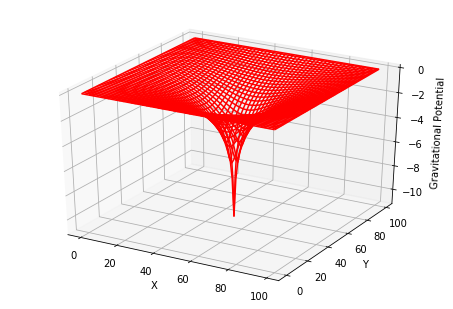

In [3]:
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *

omega=1.8
Nmax = 100; Niter = 10000; V = zeros((Nmax, Nmax), float)   

for k in range(0, Nmax):  
    V[k,0] = 0.
    V[0,k] = 0.
    
rho=zeros((Nmax,Nmax),float)
rho[50][50]=1.
    
for iter in range(Niter):                                  
    #if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1):
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]-0.25*4.*pi*rho[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j]+omega*du
    #print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Gravitational Potential')
p.show()